In [2]:
import pandas as pd
import anndata as ad
import numpy as np
import scipy.sparse as sp
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
import scanpy as sc
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance


c:\Users\jenny\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:
adata_disease = ad.read_h5ad("AD00104.h5ad")
adata_healthy = ad.read_h5ad("AD00101.h5ad")

c:\Users\jenny\anaconda3\Lib\site-packages\anndata\compat\__init__.py:363: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


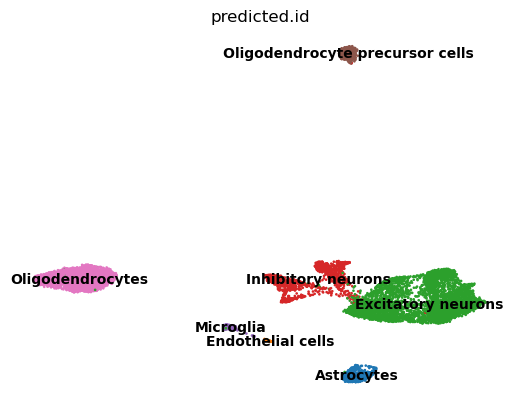

In [4]:
sc.pl.umap(adata_disease,  color="predicted.id", legend_loc="on data", frameon=False)

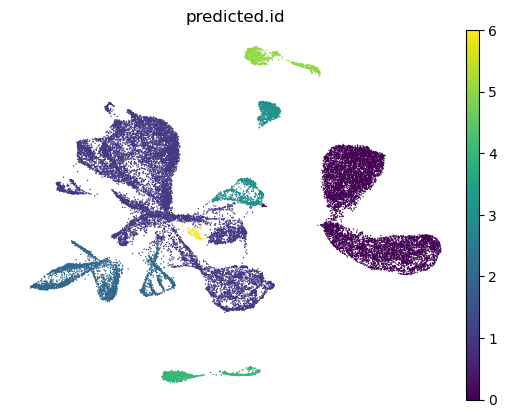

In [13]:
sc.pl.umap(adata_healthy,  color="predicted.id", legend_loc="on data", frameon=False)

In [5]:
adata_healthy.obs["marker_cell_type"] = adata_healthy.obs["predicted.id"].astype(str)

adata_healthy.obs["highlight"] = np.where(adata_healthy.obs["marker_cell_type"].isin(["5"]), adata_healthy.obs["marker_cell_type"], "Other")

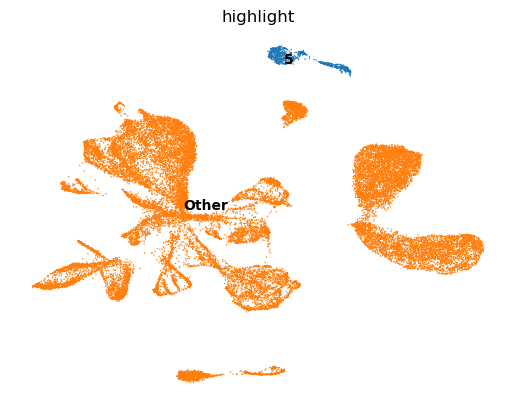

In [6]:
sc.pl.umap(adata_healthy, color="highlight", legend_loc="on data", frameon=False)

In [ ]:
adata_disease.obs["predicted.id"] = adata_disease.obs["predicted.id"].astype("category")
adata_healthy.obs["predicted.id"] = adata_healthy.obs["predicted.id"].astype("category")
adata_healthy.obs["predicted.id"] = adata_healthy.obs["predicted.id"].cat.rename_categories({5: "Microglia"})

In [54]:
adata_subset = ad.concat(
    [adata_disease, adata_healthy],
    join="outer",
    keys=["disease", "healthy"],  # Adds a new `.obs["batch"]` column
    label="batch"
)


In [ ]:
#batch correction
sc.pp.combat(adata_subset, key='batch')

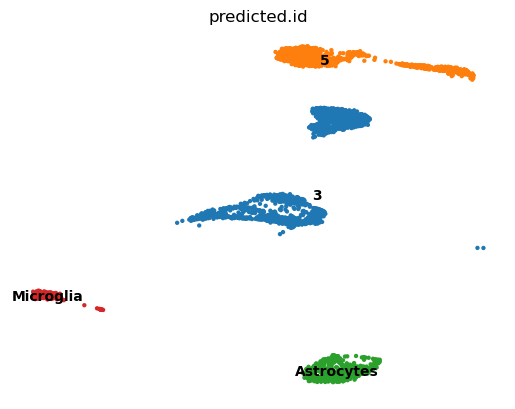

In [51]:
sc.pl.umap(adata_subset, color="predicted.id", legend_loc="on data", frameon=False)

In [44]:
expr_df = pd.DataFrame(adata_subset.X, index=adata_subset.obs_names, columns=adata_subset.var_names)


In [45]:
expr_df 

,7SK,7SK.2,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A3GALT2,...,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,hsa-mir-1199,hsa-mir-335,hsa-mir-490,hsa-mir-8072
AAACCTGAGGCGATAC.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAATGCCCACCACGTG.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AACGTTGTCTTGTTTG.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AACTCAGCAAGACACG.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AACTCAGCATTCCTGC.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTGGTAAGCTGCGAA.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TGTGGTATCATCTGTT.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TTAGGCATCAGCTCGG.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TTGAACGCATACCATG.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
adata_subset.X = np.nan_to_num(adata_subset.X)
adata_subset.X = sp.csc_matrix(adata_subset.X)

In [7]:
#Lasso select
scaler = StandardScaler(with_mean = False)
subset_scaled = scaler.fit_transform(adata_subset.X)
response = np.where(adata_subset.obs["group"]=="disease", 1, 0)
lasso = LogisticRegressionCV(
    penalty="l1",  # LASSO (L1 Regularization)
    solver="saga",  # Supports L1 on sparse matrices
    cv=5,  # 10-fold cross-validation
    max_iter=1000,
).fit(subset_scaled, response)

In [9]:
nonzero_indices = np.where(lasso.coef_ != 0)[0]
lasso_genes = adata_subset.var_names[nonzero_indices]  # Get gene names

# Print selected genes
print("Selected inflammatory genes:", lasso_genes.tolist())

Selected inflammatory genes: ['7SK', '7SK']


In [18]:
#random forest
rf = RandomForestClassifier(
    n_estimators=100,  # Reduce trees to speed up
    max_depth=5,  # Limit depth to prevent overfitting
    min_samples_split=10,  # Require more samples per split
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)
rf.fit(subset_scaled, response)

# Get feature importances
feature_importances = rf.feature_importances_

# Convert to DataFrame for better readability
feature_names = adata_subset.var_names  # Assuming gene names are stored in var_names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

selector = SelectFromModel(rf, threshold="mean", prefit=True)
selected_genes = adata_subset.var_names[selector.get_support()].tolist()



In [20]:
selected_genes

['AARD',
 'AC006159.3',
 'AC008074.4',
 'AC016582.2',
 'AC016999.2',
 'AC068831.6',
 'AC073133.1',
 'AC079586.1',
 'AC087499.10',
 'AF038458.5',
 'AL136531.1',
 'AL596220.1',
 'ANKRD33',
 'BNIPL',
 'C17orf53',
 'C17orf98',
 'C5orf48',
 'CCR9',
 'CDA',
 'CDCP2',
 'CTA-392E5.1',
 'CTC-391G2.1',
 'CTD-2256P15.5',
 'CTD-2531D15.4',
 'CTD-2545G14.7',
 'CTD-2566J3.1',
 'CTD-3037G24.4',
 'DAOA-AS1',
 'DLGAP1-AS5',
 'E2F2',
 'ERP27',
 'GOLGA6L6',
 'GRM6',
 'ITGAM',
 'LINC00348',
 'LINC00704',
 'MDS2',
 'MEIOB',
 'MIR142',
 'OVCH1-AS1',
 'PNLIP',
 'PNLIPRP3',
 'POTEF',
 'PPIAL4D',
 'RGS21',
 'RGS8',
 'RORC',
 'RP1-92C4.2',
 'RP11-107I14.5',
 'RP11-157N3.1',
 'RP11-189B4.6',
 'RP11-219A15.2',
 'RP11-222N13.1',
 'RP11-262H14.1',
 'RP11-295M18.2',
 'RP11-295P9.6',
 'RP11-30L3.2',
 'RP11-332J15.1',
 'RP11-348M17.2',
 'RP11-369E15.3',
 'RP11-379C10.4',
 'RP11-388K12.2',
 'RP11-433J20.1',
 'RP11-463J7.2',
 'RP11-473M20.5',
 'RP11-47P18.1',
 'RP11-482E14.2',
 'RP11-492L8.2',
 'RP11-502M1.2',
 'RP11-53

In [12]:
gb = HistGradientBoostingClassifier(
    max_iter=10,  # Quick proof-of-concept
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)
gb.fit(subset_scaled.toarray(), response)
print("done")

# Compute feature importances using permutation importance
perm_importance = permutation_importance(gb, subset_scaled.toarray(), response, n_repeats=5, random_state=42, n_jobs=-1)
feature_importances = perm_importance.importances_mean  # Mean importance score across repeats

# Select features above the median importance
threshold = np.median(feature_importances)
selected_genes = adata_subset.var_names[feature_importances > threshold].tolist()

# Return only the list of selected genes
selected_genes



done


PicklingError: Could not pickle the task to send it to the workers.